In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from numbers import Number
import math, cmath

In [4]:
def zin_lossless_(z0: Number, zl: Number, beta: Number, l: Number) -> Number:
    tg = cmath.tan(beta * l)
    num = z0 * (zl + 1j*z0*tg)
    den = z0 + 1j*zl*tg
    return num/den

def zin_lossless_times_(z0: Number, zl: Number, beta_times_l: Number) -> Number:
    tg = cmath.tan(beta_times_l)
    num = z0 * (zl + 1j*z0*tg)
    den = z0 + 1j*zl*tg
    return num/den

def V_lossless_(V0: Number, reflection_coefficient: Number, beta: Number, z: Number):
    V = V0*(cmath.exp(-1j*beta*z) + reflection_coefficient*cmath.exp(1j*beta*z))
    return V

def I_lossless_(V0: Number, Z0: Number, reflection_coefficient: Number, beta: Number, z: Number):
    I = (V0/Z0)*(cmath.exp(-1j*beta*z) - reflection_coefficient*cmath.exp(1j*beta*z))
    return I

def reflection_coefficient_(z0: Number, zl: Number) -> Number:
    num = zl - z0
    den = zl + z0
    return num/den

def reflection_coefficient_l_(reflection_coefficient, beta, l):
    return reflection_coefficient * cmath.exp(-2*1j*beta*l)

def swr_(reflection_coefficient):
    return (1 + abs(reflection_coefficient))/(1 - abs(reflection_coefficient))

def propagation_constant_circuit_(R, L, G, C, w):
    term_1 = R + 1j*w*L
    term_2 = G + 1j*w*C
    return cmath.sqrt(term_1*term_2)

def propagation_constant_(w, permittivity, permeability):
    return w*cmath.sqrt(permittivity*permeability)

def impedance_(R, L, G, C, w):
    a = R + 1j*w*L
    b = G + 1j*w*C
    return cmath.sqrt(a/b)

def atenuation_(alpha, l, in_db = False):
    value = math.exp(-1 * alpha * l)
    if in_db:
        return -2 * math.log10(value)

    return value

def unit_to_db_(value):
    return 20 * math.log10(value)

def format_complex(z):
    msg = (f'z = {z.real}+{z.imag}j in rectangular coordinates \n'
           f'or z = {abs(z)}*e^{(cmath.phase(z)*180/cmath.pi + 360)%360}j in polar coordinates (using degrees)\n')
    return msg    

In [5]:
R1 = 4
L1 = 0.5 * 1e-6
G1 = 0.02
C1 = 200 * 1e-12
w1 = 800 * 1e6

gama1 = propagation_constant_circuit_(R1, L1, G1, C1, w1)
alpha1 = gama1.real

l1 = 0.3
atenuation1 = atenuation_(alpha1, l1)
atenuation1_db = atenuation_(alpha1, l1, True)
print("gama: " + str(gama1))
print(f'atenuation after {l1} m is {atenuation1_db} dB')

gama: (0.5391135357553036+8.01315439789067j)
atenuation after 0.3 m is 0.14048042021872792 dB


In [6]:
# Lista 1

# 2.2 (Pozar 3 ed.)
L = 0.2*1e-6
C = 300*1e-12
R = 5
G = 0.01 
w = 500*1e6

pc_lossy = propagation_constant_circuit_(R, L, G, C, w)
ch_impedance_lossy = impedance_(R, L, G, C, w)
print('pc_lossy: ' + format_complex(pc_lossy))
print(ch_impedance_lossy)

pc_lossless = propagation_constant_circuit_(0, L, 0, C, w)
ch_impedance_lossless = impedance_(0, L, 0, C, w)
print(pc_lossless)
print(ch_impedance_lossless)

pc_lossy: z = 0.22591621095124334+3.873117366459551j in rectangular coordinates 
or z = 3.879700538539171*e^86.66175996979894j in polar coordinates (using degrees)

(25.806494118515268+0.21432486822606223j)
3.872983346207417j
(25.819888974716115+0j)


In [7]:
# 2.6
def L_coax(permeability, b, a):
    return (permeability*math.log(b/a))/ (2*math.pi)

def C_coax(permittivity_real, b, a):
    return (2*math.pi*permittivity_real)/math.log(b/a)

def Rs(w, condutivity, permeability):
    return math.sqrt((w*permeability)/(2*condutivity))

def R_coax(Rs, b, a):
    return (Rs/(2*math.pi))*((1/a) + (1/b))

def G_coax(w, permittivity_imag, b, a):
    return (2*math.pi*w*permittivity_imag)/math.log(b/a)

# Vacuum constants
permeability = 4*math.pi*1e-7
permittivity = 8.854*1e-12

# Frequency
f = 1*1e9 # 1GHz
w = 2*math.pi*f

# Dimensions
b = 3.02*1e-3 # outer radius
a = 0.91*1e-3 # inner radius

# Conductor is Copper:
condutivity_copper = 5.813*1e7
permeability_copper = permeability
Rs_copper = Rs(w, condutivity_copper, permeability_copper)
print(f'Rs={Rs_copper}')

# Dieletric is Teflon
permittivity_relative_teflon = 2.08
loss_tan_teflon = 4*1e-4
permittivity_real_teflon = permittivity_relative_teflon * permittivity
permittivity_imag_teflon = loss_tan_teflon * permittivity_real_teflon

L = L_coax(permeability_copper, b, a)
C = C_coax(permittivity_real_teflon, b, a)
R = R_coax(Rs_copper, b, a)
G = G_coax(w, permittivity_imag_teflon, b, a)
print(f'L={L} C={C} R={R} G={G}')

impedance = impedance_(R, L, G, C, w)
propagation_constant = propagation_constant_circuit_(R, L, G, C, w)
print(f'Z={impedance} propagation_constant={propagation_constant}')

Rs=0.008240996067111548
L=2.39913502171604e-07 C=9.646239181115444e-11 R=1.8756165388694308 G=0.0002424364331692984
Z=(49.87104220166847-0.02105193129526322j) propagation_constant=(0.024849945426179916+30.22638887076501j)


In [8]:
# 2.8

z0 = 75
zl = 30 - 1j*20

reflection_coefficient = reflection_coefficient_(z0, zl)
print(cmath.polar(reflection_coefficient))

swr = swr_(reflection_coefficient)
print(swr)

reflection_coefficient_at_input = reflection_coefficient * cmath.exp(1.2*cmath.pi*1j)
print(cmath.polar(reflection_coefficient_at_input))

beta_times_l = 0.6*cmath.pi
zin = zin_lossless_times_(z0, zl, beta_times_l)
print(zin)

(0.4607101359007234, -2.5351468187057935)
2.7085807339257255
(0.4607101359007234, 1.2347643656019582)
(202.9897237775293-5.192938734670089j)


In [9]:
# 2.13

Z0 = 75
l = 2*1e-2
ZL = 37.5+1j*75
epsilon = 2.56
f = 3*1e9
w = 2*math.pi*f
dielectric_constant = 2.56
permittivity_vacuum = 8.854*1e-12
permittivity = dielectric_constant*permittivity_vacuum
permeability = 4*cmath.pi*1e-7

reflection_coef = reflection_coefficient_(Z0, ZL)
print('reflection coefficient: ' + format_complex(reflection_coef))

swr = swr_(reflection_coefficient)
print('swr: ' + format_complex(swr))

propagation_constant = propagation_constant_(w, permittivity, permeability)
print('beta: ' + format_complex(propagation_constant))

zin = zin_lossless_(Z0, ZL, propagation_constant, l)
print('zin: ' + format_complex(zin))

reflection_coef_at_input = reflection_coefficient_l_(reflection_coef, propagation_constant, l)
print('reflection coefficient at input: ' + format_complex(reflection_coef_at_input))



reflection coefficient: z = 0.07692307692307693+0.6153846153846154j in rectangular coordinates 
or z = 0.6201736729460423*e^82.8749836510982j in polar coordinates (using degrees)

swr: z = 2.7085807339257255+0.0j in rectangular coordinates 
or z = 2.7085807339257255*e^0.0j in polar coordinates (using degrees)

beta: z = 100.59949406376721+0.0j in rectangular coordinates 
or z = 100.59949406376721*e^0.0j in polar coordinates (using degrees)

zin: z = 18.97128757381949+-20.442597779037794j in rectangular coordinates 
or z = 27.889237281863387*e^312.8621559507131j in polar coordinates (using degrees)

reflection coefficient at input: z = -0.5241054260496188+-0.3315552548229814j in rectangular coordinates 
or z = 0.6201736729460423*e^212.31792641088862j in polar coordinates (using degrees)



reflection_coefficient: z = -0.058823529411764705+-0.23529411764705882j in rectangular coordinates 
or z = 0.24253562503633297*e^255.9637565320735j in polar coordinates (using degrees)



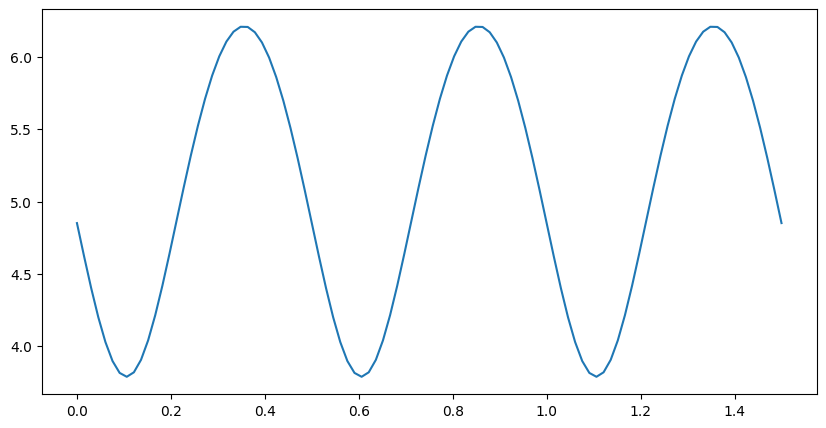

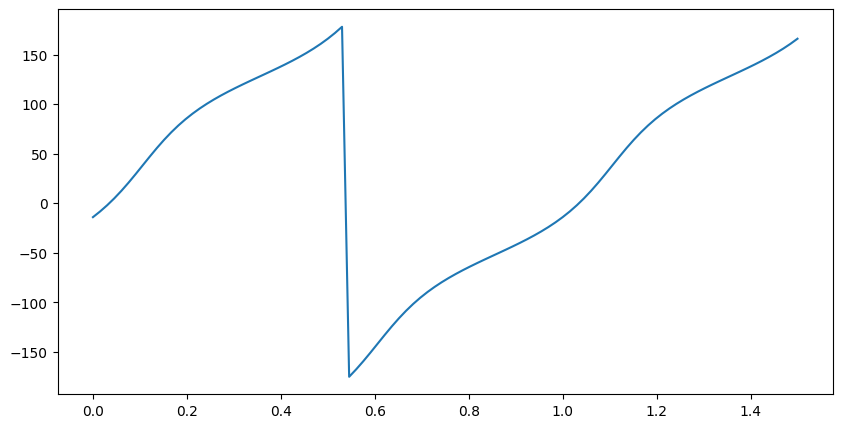

In [10]:
# 2.18

R = 100
Vsource = 10
Z0 = 100
ZL = 80 - 1j*40

reflection_coef = reflection_coefficient_(Z0, ZL)
print("reflection_coefficient: " + format_complex(reflection_coef))

x = np.linspace(0, 3/2, 100)
v = 5 * (np.exp(2*cmath.pi*1j*x) + reflection_coef * np.exp(-2*cmath.pi*1j*x))
phase = np.angle(v, deg=True)
modulo = np.abs(v)

fig = plt.figure(figsize = (10, 5))

plt.plot(x, modulo)
plt.show()

fig = plt.figure(figsize = (10, 5))

plt.plot(x, phase)
plt.show()

In [155]:
# Impedance matching

def quarter_wave_transformer():
    raise NotImplementedError()

def load_to_real(Z0, ZL):
    RL = ZL.real
    XL = ZL.imag
    
    a = Z0*XL
    b = (XL**2 + RL**2 - Z0**2)
    c = -1*X*Z0
    eq_coef = [a, b, c]
    
    tangents = np.roots(eq_coef)
    print(f'tangents: {tangents}')

    thetas = (np.arctan(tangents) + np.pi) % np.pi
    print(f'thetas: {thetas}')

    d = thetas/(2*np.pi)
    print(f'd: {d} (wavelength)')

    Zin = Z0*(ZL*np.cos(thetas) + 1j*Z0*np.sin(thetas))/(Z0*np.cos(thetas) + 1j*ZL*np.sin(thetas))
    print(f'Zin: {Zin}')

    return Zin

def stub_transformer_parallel(Z0, ZL, R = Z0):
    RL = ZL.real
    XL = ZL.imag
    
    a = Z0**2 - R*RL
    b = 2*XL*Z0
    c = RL**2 + XL**2 - R*RL
    eq_coef = [a, b, c]

    tangents = np.roots(eq_coef)
    print(f'tangents: {tangents}')
    thetas = (np.arctan(tangents) + np.pi) % np.pi
    print(f'thetas: {thetas}')
    d = thetas/(2*np.pi)
    print(f'd: {d} (wavelength)')

    Zin = Z0*(ZL + 1j*Z0*np.tan(thetas))/(Z0 + 1j*ZL*np.tan(thetas))
    print(f'Zin: {Zin}')
    Yin = 1/Zin
    print(f'Yin: {Yin}')

    B = Yin.imag
    print(f'B: {B}')
    Y0 = 1/Z0
    print(f'Y0: {Y0}')

    print('\n')
    
    theta_open_stub = (np.arctan(B/Y0) + np.pi) % -np.pi
    print(f'theta_open_stub: {theta_open_stub}')
    length_open_stub = (-1*theta_open_stub)/(2*np.pi)
    print(f'length_open_stub: {length_open_stub} (wavelength)')

    print('\n')

    theta_short_stub = (np.arctan(Y0/B) + np.pi) % np.pi
    print(f'theta_short_stub: {theta_short_stub}')
    length_short_stub = theta_short_stub/(2*np.pi)
    print(f'length_short_stub: {length_short_stub} (wavelength)')    
        
    print('\n')

def stub_transformer_series(Z0, ZL, R = Z0):
    RL = ZL.real
    XL = ZL.imag

    k = R/(Z0**2 * RL)
    a = (k*XL**2 + k*RL**2 - 1)
    b = -2*Z0*XL*k
    c = k*Z0**2 - 1
    eq_coef = [a, b, c]
    
    tangents = np.roots(eq_coef)
    print(f'tangents: {tangents}')
    thetas = (np.arctan(tangents) + np.pi) % np.pi
    print(f'thetas: {thetas}')
    d = thetas/(2*np.pi)
    print(f'd: {d} (wavelength)')

    Zin = Z0*(ZL + 1j*Z0*np.tan(thetas))/(Z0 + 1j*ZL*np.tan(thetas))
    print(f'Zin: {Zin}')

    X = Zin.imag
    print(f'X: {X}')

    print('\n')

    theta_open_stub = (np.arctan(Z0/X) + np.pi) % np.pi
    print(f'theta_open_stub: {theta_open_stub}')
    length_open_stub = theta_open_stub/(2*np.pi)
    print(f'length_open_stub: {length_open_stub} (wavelength)')

    print('\n')

    theta_short_stub = (np.arctan(X/Z0) + np.pi) % -np.pi
    print(f'theta_short_stub: {theta_short_stub}')
    length_short_stub = -1*theta_short_stub/(2*np.pi)
    print(f'length_short_stub = {length_short_stub} (wavelength')
    
    print('\n')

In [163]:
# %%capture
# 5.3 and 5.4

Z0 = 75
ZL = 100 + 1j*80
stub_transformer_parallel(Z0, ZL)

tangents: [-18.1976741  -1.0023259]
thetas: [1.62569319 2.35503289]
d: [0.25873711 0.37481513] (wavelength)
Zin: [33.03964758-23.6720102j 33.03964758+23.6720102j]
Yin: [0.02+0.01432946j 0.02-0.01432946j]
B: [ 0.01432946 -0.01432946]
Y0: 0.013333333333333334


theta_open_stub: [-2.32020053 -0.82139212]
length_open_stub: [0.36927138 0.13072862] (wavelength)


theta_short_stub: [0.74940421 2.39218845]
length_short_stub: [0.11927138 0.38072862] (wavelength)




In [161]:
# 5.5 and 5.6

Z0 = 50
ZL = 30 - 1j*40
stub_transformer_series(Z0, ZL)

tangents: [-3.73205081 -0.26794919]
thetas: [1.83259571 2.87979327]
d: [0.29166667 0.45833333] (wavelength)
Zin: [50.+57.73502692j 50.-57.73502692j]
X: [ 57.73502692 -57.73502692]


theta_open_stub: [0.71372438 2.42786827]
length_open_stub: [0.11359276 0.38640724] (wavelength)


theta_short_stub: [-2.28452071 -0.85707195]
length_short_stub = [0.36359276 0.13640724] (wavelength




In [12]:
# Lista 1 extra question
f = 2e9
w = 2*math.pi*f
L = 5.6e-9

ZL = 30 + 1j*w*L
Z0 = 50
Zin = load_to_real(Z0, ZL)

Zt = np.sqrt(Zin*Z0)
print(f'Zt: {Zt}')

tangents: [-1.58401304  0.63130794]
thetas: [2.13391883 0.5631225 ]
x: [0.33962373 0.08962373] (wavelenght)
Zin: [  9.28967139-4.85514795e-15j 269.11608542+1.56791809e-13j]
Zt: [ 21.55188088-5.63193066e-15j 115.99915634+3.37915839e-14j]


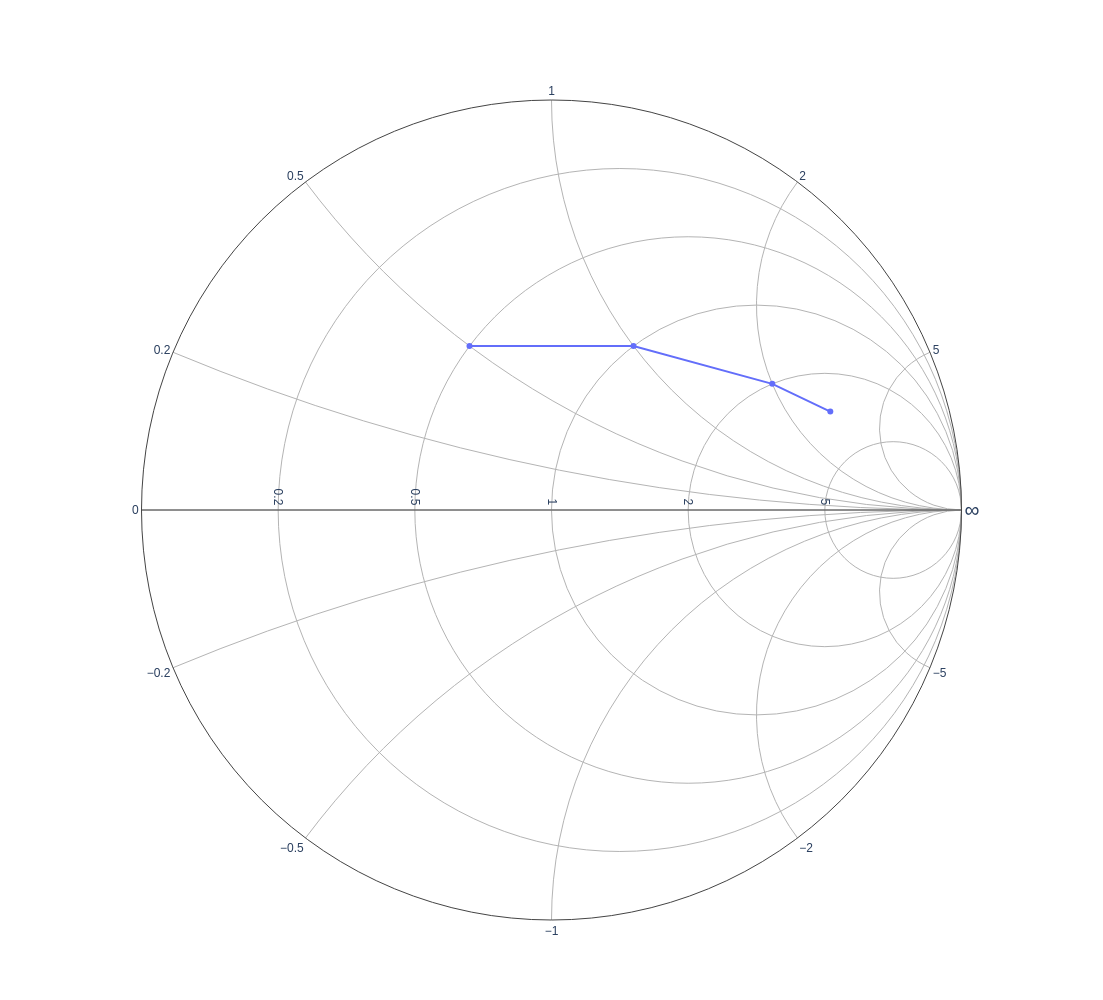

In [62]:
# Smith charts
import plotly.graph_objects as go

fig = go.Figure(go.Scattersmith(imag=[0.5, 1, 2, 3], real=[0.5, 1, 2, 3]))
fig.update_layout(
    autosize=False,
    width=1000,
    height=1000,
)
fig.show()